In [3]:
import fastf1 as fastf1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

import fastf1.plotting


# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl(misc_mpl_mods=False)

# load a session and its telemetry data
session = fastf1.get_session(2023, 4, 'Q')
session.load()

req         WARNING 	

DEFAULT CACHE ENABLED!
	Cache directory: /home/dang032003/.cache/fastf1.
	Size: 46.14 MB
core           INFO 	Loading data for Azerbaijan Grand Prix - Qualifying [v3.0.0]
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
logger      WARNING 	Failed to load result data from Ergast! (This is expected for recent sessions)
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing dat

In [5]:
# select drivers to compare
alo_lap = session.laps.pick_driver('ALO').pick_fastest()
rus_lap = session.laps.pick_driver('RUS').pick_fastest()
per_lap = session.laps.pick_driver('PER').pick_fastest()
sai_lap = session.laps.pick_driver('SAI').pick_fastest()

# telemetry data
alo_tel = alo_lap.get_car_data().add_distance()
rus_tel = rus_lap.get_car_data().add_distance()
per_tel = per_lap.get_car_data().add_distance()
sai_tel = sai_lap.get_car_data().add_distance()



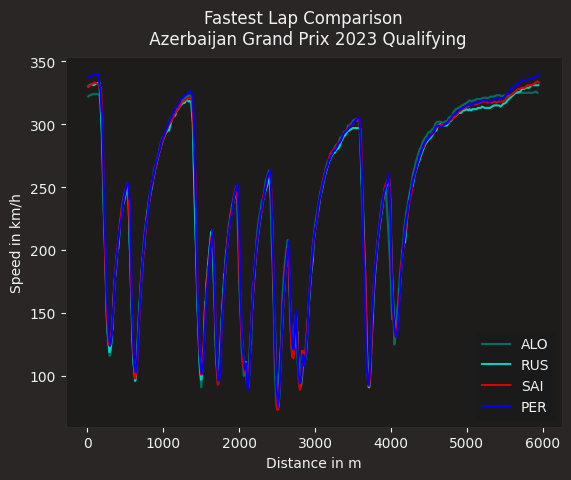

In [6]:
# plotting data
rbr_color = fastf1.plotting.team_color('RBR')
mer_color = fastf1.plotting.team_color('MER')
amr_color = fastf1.plotting.team_color('AMR')
fer_color = fastf1.plotting.team_color('FER')

fig, ax = plt.subplots()
ax.plot(alo_tel['Distance'], alo_tel['Speed'], color=amr_color, label='ALO')
ax.plot(rus_tel['Distance'], rus_tel['Speed'], color=mer_color, label='RUS')
ax.plot(sai_tel['Distance'], sai_tel['Speed'], color=fer_color, label='SAI')
ax.plot(per_tel['Distance'], per_tel['Speed'], color=rbr_color, label='PER')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{session.event['EventName']} {session.event.year} Qualifying")

plt.show()